In [67]:
import pandas as pd 
import yfinance as yf
import numpy as np

import sys
import os
# Add the parent directory to the sys.path
sys.path.append(os.path.join(os.path.dirname('Practice'), '..'))

from Practice import project_test1

## Stock Universe 

Get the stocks from S&P 500 that were there in 2018. We choose this year to avoid Covid pandemic in 2020. We also are concentrating on the top 200 companies by market capitalization based on current market cap.

**Note:** 
- This is an assumption which can bias the analysis, the market cap ideally should be historical market cap in the year 2019. But we are assuming that the top 200 companies by market cap currenly have not changed in last a few years.

- Later when we use the market cap in our analysis this can be very important there. We can use the data from the [FMP](https://site.financialmodelingprep.com/) for detailed analysis using market cap in 2018 but for now I will skip it.

In [71]:
import yfinance as yf
import pandas as pd

# Define a function to get market cap for a list of tickers
def get_market_caps(tickers):
    """ 
    Parameters:
    tickers : list
        List of tickers
    Returns:
    market_caps : dict
        Dictionary with market cap for each ticker
    """
    market_caps = {}
    for ticker in tickers:
        try:
            stock = yf.Ticker(ticker)
            market_cap = stock.info['marketCap']
            market_caps[ticker] = market_cap
        except Exception as e:
            pass
    return market_caps

# List of S&P 500 tickers
sp500_tickers = pd.read_html('https://en.wikipedia.org/w/index.php?title=List_of_S%26P_500_companies&oldid=828491336')[0]['Ticker symbol'].tolist()

# Get market caps for the tickers
market_caps = get_market_caps(sp500_tickers)

# Create a DataFrame and sort by market cap
market_caps_df = pd.DataFrame(market_caps.items(), columns=['Ticker', 'MarketCap'])
market_caps_df = market_caps_df.sort_values(by='MarketCap', ascending=False)

# Get the top 200 companies by market cap
top_200_companies = market_caps_df.head(200)

# Save to a CSV file
top_200_companies.to_csv('top_200_companies_by_market_cap.csv', index=False)

print("Top 200 companies by market cap saved to 'top_200_companies_by_market_cap.csv'")


ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ATVI?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ATVI&crumb=fzIcTFUeoGa
ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ABC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ABC&crumb=fzIcTFUeoGa
ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ARNC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ARNC&crumb=fzIcTFUeoGa
ERROR:yfinance:404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/DISH?modules=financialData%2CquoteType%2CdefaultKeyStatist

Top 200 companies by market cap saved to 'top_200_companies_by_market_cap.csv'


In [72]:
# read the csv file
top_200_companies = pd.read_csv('../Data/top_200_companies_by_market_cap.csv')

In [ ]:
top_200_companies.columns

Index(['Ticker', 'MarketCap'], dtype='object')

In [73]:
def get_data(tickers, start="2018-01-01", end="2020-01-01"):
    """
    Parameters:
    tickers : list
        List of tickers
    start : str
        Start date for data retrieval
    end : str
        End date for data retrieval
    Returns:
    data : pandas.DataFrame
        Dataframe with stock Adj Close for each ticker
    """
    data = yf.download(tickers, start=start, end=end,progress=False)['Adj Close']
    return data

close_prices = get_data(top_200_companies['Ticker'].tolist())

close_prices.to_csv('../Data/close_prices.csv')

In [74]:
close_prices.head()

Ticker,A,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADP,ADSK,AEP,...,VRTX,VZ,WELL,WFC,WM,WMB,WMT,XOM,YUM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,64.40124512,40.61587906,72.92350006,52.29357147,139.22401428,177.69999695,79.77664948,101.14105988,107.12000275,56.97957230,...,152.91000366,37.79150009,49.70185089,50.24272537,76.70402527,21.15681458,29.33925438,62.13378906,72.57665253,68.44867706
2018-01-03,66.03985596,40.60882187,74.06465912,52.40920639,139.86657715,181.03999329,80.76631927,102.23976135,109.37999725,56.49957657,...,152.00999451,37.01492310,49.78723145,50.62927246,77.81759644,21.74111366,29.59518051,63.35409164,72.51436615,68.76342010
2018-01-04,65.54443359,40.79745102,73.64228058,52.32026291,141.52273560,183.22000122,80.67796326,103.21637726,112.06999969,55.83071518,...,153.07000732,37.13493347,48.71604538,51.26255035,78.48577118,22.11478424,29.62195969,63.44179535,73.25260925,69.17350769
2018-01-05,66.59239197,41.26193619,74.92425537,52.47146988,142.69012451,185.33999634,81.00490570,103.15535736,110.83999634,55.71266937,...,155.69000244,37.05021667,48.41331863,51.60797119,78.38776398,22.05363274,29.79753494,63.39062500,73.67951965,69.96512604
2018-01-08,66.73529816,41.10868454,73.72379303,52.32026291,143.83042908,185.03999329,81.14630127,102.84142303,111.41999817,56.20055389,...,156.88999939,36.98667145,48.58408356,51.02404404,78.44123840,22.13516617,30.23797035,63.67561340,73.80404663,70.80438995


In [75]:
# resample prices to get month end prices
def get_month_end_prices(close_prices,freq='ME'):
    """ 
    Parameters:
    prices : DataFrame
        Prices for each ticker and date
    Returns:
    prices_resampled : DataFrame
        Prices for each ticker and month end date
    """
    prices_resampled = close_prices.resample(freq).last()
    return prices_resampled

prices_month_end = get_month_end_prices(close_prices, freq='ME')


## Momentum Strategy based on returns

For now lets consider the log return for each month of a ticker as momentum indicator. We get top 50 and bottom 50performers for each month. We go long on top performers and short on bottom performers with equal money allocation.

In [76]:
# get log returns for monthly data
def get_monthly_log_returns(prices):
    """ 
    Parameters
    ----------
    prices : DataFrame
        Close prices for each ticker and date
    Returns
    -------
    log_returns : DataFrame
        Log returns for each ticker and date
    """
    log_returns = np.log(prices).diff()
    return log_returns

monthly_close_returns = get_monthly_log_returns(prices_month_end)
monthly_close_returns.head()

Ticker,A,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADP,ADSK,AEP,...,VRTX,VZ,WELL,WFC,WM,WMB,WMT,XOM,YUM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,-0.06818562,0.06596082,0.03166263,-0.02988210,0.00192700,0.04583947,-0.01900848,-0.06958251,0.01587402,-0.03797585,...,-0.00504655,-0.12450960,-0.11722581,-0.11288234,-0.02414955,-0.12289314,-0.16916296,-0.13187005,-0.03406447,0.05242630
2018-03-31,-0.02494791,-0.05980366,-0.20193773,-0.00681940,-0.04776549,0.03269263,0.01600156,-0.01059953,0.06676003,0.04487585,...,-0.01854102,0.00167398,0.03610226,-0.10838969,-0.02035094,-0.09787692,-0.00567733,-0.01503204,0.04504998,0.03224727
2018-04-30,-0.01526169,-0.01513374,0.03017975,-0.02552635,-0.00631160,0.02522526,-0.04236412,0.03973560,0.00254493,0.02006297,...,-0.06214432,0.04399808,-0.01835577,-0.00862328,-0.03422139,0.03439757,-0.00574871,0.04122399,0.02287733,0.00110760
2018-05-31,-0.05986417,0.12674163,0.02445297,0.05684299,0.02958442,0.11770278,0.10664203,0.09632612,0.02509939,-0.02017525,...,0.00546945,-0.03463558,0.09143776,0.04582558,0.01731763,0.04298051,-0.06298714,0.05399430,-0.06422650,0.00263151


<Axes: xlabel='Date', ylabel='AAPL monthly log returns'>

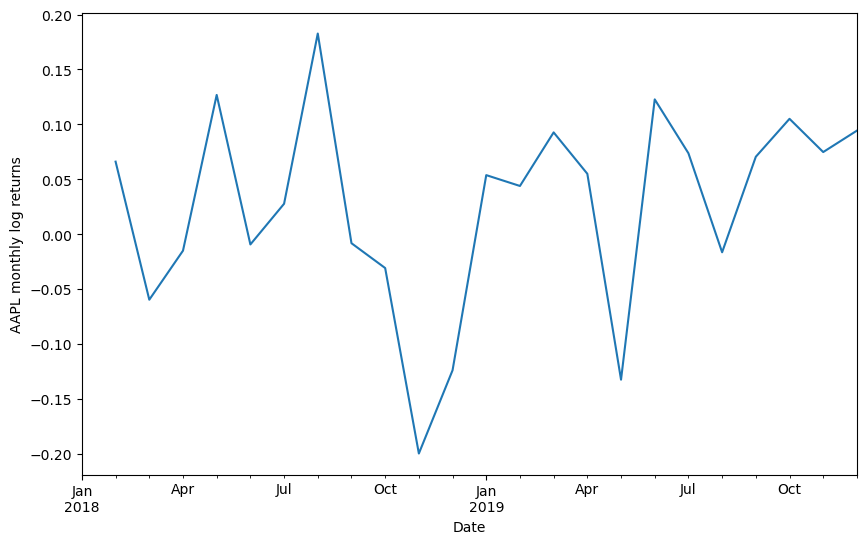

In [77]:
monthly_close_returns.loc[:, 'AAPL'].plot(figsize=(10, 6),ylabel='AAPL monthly log returns')

We note that the choice of stocks to go long and short can be made starting from the start of third month using the return at the end of second month. That's why we need to shift the returns before using them.

In [78]:
# define function that give shifted returns for each ticker
def shift_returns(returns, shift_n):
    """ 
    Parameters:
    returns : pd.DataFrame
        Returns for each ticker and date
    shift_n : int
        Number of periods to move, can be positive or negative
    Returns: 
    shifted: pd.DataFrame
        Shifted returns for each ticker
    """
    shifted = returns.shift(shift_n)
    return shifted

# shift returns
prev_month_returns = shift_returns(monthly_close_returns, 1)
lookahead_returns = shift_returns(monthly_close_returns, -1)

prev_month_returns.head()

Ticker,A,AAPL,ABBV,ABT,ACN,ADBE,ADI,ADP,ADSK,AEP,...,VRTX,VZ,WELL,WFC,WM,WMB,WMT,XOM,YUM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-31,-0.06818562,0.06596082,0.03166263,-0.02988210,0.00192700,0.04583947,-0.01900848,-0.06958251,0.01587402,-0.03797585,...,-0.00504655,-0.12450960,-0.11722581,-0.11288234,-0.02414955,-0.12289314,-0.16916296,-0.13187005,-0.03406447,0.05242630
2018-04-30,-0.02494791,-0.05980366,-0.20193773,-0.00681940,-0.04776549,0.03269263,0.01600156,-0.01059953,0.06676003,0.04487585,...,-0.01854102,0.00167398,0.03610226,-0.10838969,-0.02035094,-0.09787692,-0.00567733,-0.01503204,0.04504998,0.03224727
2018-05-31,-0.01526169,-0.01513374,0.03017975,-0.02552635,-0.00631160,0.02522526,-0.04236412,0.03973560,0.00254493,0.02006297,...,-0.06214432,0.04399808,-0.01835577,-0.00862328,-0.03422139,0.03439757,-0.00574871,0.04122399,0.02287733,0.00110760


In [79]:
# function to get top industries for a given date and sector

def get_top_n(prev_returns, top_n):
    """
    Select the top performing stocks
    
    Parameters
    ----------
    prev_returns : DataFrame
        Previous shifted returns for each ticker and date
    top_n : int
        The number of top performing stocks to get
    
    Returns
    -------
    top_stocks : DataFrame
        Top stocks for each ticker and date marked with a 1
    """

    # interate over each date and get top industries for each date
    top_stocks = pd.DataFrame(columns=prev_returns.columns)
    for date, tickers in prev_returns.iterrows():
        
        if(tickers.dropna().shape[0]==0):
            signal = [0 for i in range(len(tickers))]
        else:
            # get top tickers for the date
            top_tickers = tickers.loc[:].nlargest(top_n)
            
            # for top_stocks tickers put the value 1 for rest 0
            signal = [1 if ticker in top_tickers.index.tolist() else 0 for ticker in tickers.index.tolist()]

        top_stocks.loc[date] = signal
        
    return top_stocks
  
# get long and short holdings
long_df = get_top_n(prev_month_returns, 50)
short_df = get_top_n(prev_month_returns, -50)


In [80]:
# function to calculate portfolio returns
# Compute expected returns for the portfolio, assuming equal investment in each long/short stock.

def portfolio_returns(df_long, df_short, lookahead_returns, n_stocks):
    """
    Parameters
    ----------
    df_long : DataFrame
        Top stocks for each ticker and date marked with a 1
    df_short : DataFrame
        Bottom stocks for each ticker and date marked with a 1
    lookahead_returns : DataFrame
        Lookahead returns for each ticker and date
    n_stocks: int
        The number of stocks chosen for each month
    
    Returns
    -------
    portfolio_returns : DataFrame
        Expected portfolio returns for each ticker and date
    """
    # it is the average of returns for long and short stocks
    # divided by number of stocks as the weighting for each stock is equal

    portfolio_returns =  (df_long * lookahead_returns  - df_short * lookahead_returns)/n_stocks
    
    
    return portfolio_returns


expected_returns = portfolio_returns(long_df, short_df, lookahead_returns, 50)

<Axes: ylabel='Portfolio Returns'>

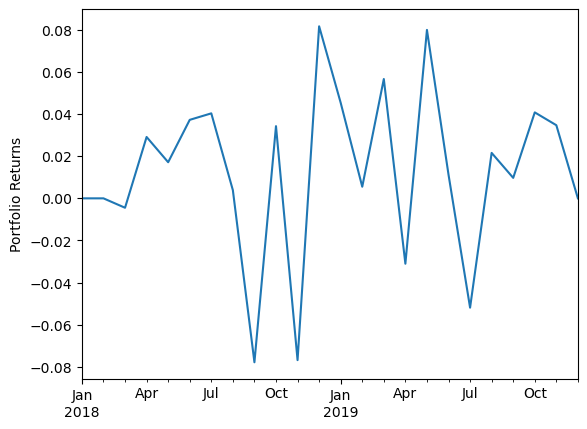

In [81]:
expected_returns.T.sum().plot(ylabel='Portfolio Returns')

# Analyse the strategy

To analyze how a particular strategy performs one must perform tests to interpret the significance resulting returns.
Here I will use the T-test  as the diagnostics.

In [82]:
# get annualised returns
portfolio_returns = expected_returns.T.sum().dropna()

# mean portfolio returns
mean_portfolio_returns = portfolio_returns.mean() 

# get standard error
portfolio_ret_ste = portfolio_returns.sem()

# get percentage annualised rate of return from the log portfolio returns
portfolio_ret_annual_rate = (np.exp(mean_portfolio_returns * 12) - 1) * 100

print(f"""Mean: {mean_portfolio_returns:.6f}
Standard Error:{portfolio_ret_ste:.6f}
Annualized Rate of Return:{portfolio_ret_annual_rate:.6f}""")


Mean: 0.012798
Standard Error:0.008398
Annualized Rate of Return:16.599148


A one-tailed (single-tail) t-test is a statistical test used to determine whether there is significant evidence that a sample mean is greater than or less than a hypothesized population mean. Unlike a two-tailed t-test, which tests for any significant difference regardless of direction, a one-tailed test focuses on a specific direction.

### Hypothesis:
- **Null Hypothesis (H₀):** The sample mean is equal to the population mean (no effect).
- **Alternative Hypothesis (H₁):** The sample mean is either greater than or less than the population mean, depending on the direction specified (e.g., mean > population mean).

### Interpretation of p-value:
- The p-value indicates the probability of obtaining a test statistic at least as extreme as the one observed, under the null hypothesis.
- **Low p-value (typically < 0.05):** Reject the null hypothesis, suggesting significant evidence that the sample mean is greater than or less than the population mean in the specified direction.
- **High p-value:** Fail to reject the null hypothesis, indicating insufficient evidence to support the alternative hypothesis.

In [83]:
from scipy import stats

def analyze_alpha(portfolio_returns):
    """
    Perform a t-test with the null hypothesis being that the expected mean return is zero.
    
    Parameters
    ----------
    portfolio_returns_by_date : Pandas Series
        Expected portfolio returns for each date
    
    Returns
    -------
    t_value
        T-statistic from t-test
    p_value
        Corresponding p-value
    """
    # stats.ttest_1samp performs two tailed t-test so we devide the p-value by 2
    # parameters are values to be analysed and the mean for null hypothesis which is zero in our case

    t_value, p_value = stats.ttest_1samp(portfolio_returns, 0)


    return t_value, p_value/2


t_value, p_value = analyze_alpha(portfolio_returns)

# chose a alpha value for the t-test
alpha = 0.05

print(f"""T-value: {t_value:.6f}
P-value: {p_value:.6f}""")

if p_value < alpha:
    print("Reject the null hypothesis that the expected mean return is zero.")
else:
    print("Fail to reject the null hypothesis that the expected mean return is zero.")

T-value: 1.523847
P-value: 0.070590
Fail to reject the null hypothesis that the expected mean return is zero.


Since we are unable to reject the null hypothesis in our t-test, we conclude that the returns generated by the strategy of selecting stocks to go long and short using the previous month's returns, with equal weight, are not significantly different from what could be expected by random chance. This suggests that the strategy does not provide returns that are reliably distinguishable from random fluctuations. We may need to reconsider the strategy or explore other factors to improve its effectiveness.

## Momentum Strategy based on returns+mcap

Here I will try to modify the momentum strategy using the market information of the companies we have selected for trading. In the previous strategy I had given equal weight(money fraction) to each stock whether it was buying (long) or for shorting. In this new strategy I will give 50% fraction to each long and short trades but assign the weights(fraction of money) for long/short trades based on the market caps of the companies. I will test this strategy in the same way.

In [89]:
# set weights based on market cap of a ticker 

tickers_long = top_200_companies[top_200_companies['Ticker'].isin(long_df.columns)]
tickers_short = top_200_companies[top_200_companies['Ticker'].isin(short_df.columns)]

# arrange the tickers like the close prices dataframe
tickers_long = tickers_long.set_index('Ticker')
tickers_short = tickers_short.set_index('Ticker')

# get weights
weight_long = tickers_long.apply(lambda x: x['MarketCap'] / tickers_long['MarketCap'].sum(), axis=1)
weight_short = tickers_short.apply(lambda x: x['MarketCap'] / tickers_short['MarketCap'].sum(), axis=1)



In [90]:
# modify the portfolio returns function to include weights

def portfolio_returns(df_long, df_short, lookahead_returns, weight_long, weight_short):
    """
    Parameters
    ----------
    df_long : DataFrame
        Top stocks for each ticker and date marked with a 1
    df_short : DataFrame
        Bottom stocks for each ticker and date marked with a 1
    lookahead_returns : DataFrame
        Lookahead returns for each ticker and date
    weight_long: float
        The weight of long stocks
    weight_short: float
        The weight of short stocks
    
    Returns
    -------
    portfolio_returns : DataFrame
        Expected portfolio returns for each ticker and date
    """

    # divide by 2 for 50% allocation to long and short
    weight_long = weight_long / 2
    weight_short = weight_short / 2

    # get weights corresponding to the long and short stocks
    wt_long = weight_long.loc[df_long.columns]
    wt_short = weight_short.loc[df_short.columns]
    
    # it is the average of returns for long and short stocks
    # divided by number of stocks as the weighting for each stock is equal

    portfolio_returns =  (df_long * lookahead_returns*wt_long  - df_short * lookahead_returns*wt_short)
    
    
    return portfolio_returns


expected_returns = portfolio_returns(long_df, short_df, lookahead_returns, weight_long, weight_short)

<Axes: ylabel='Portfolio Returns'>

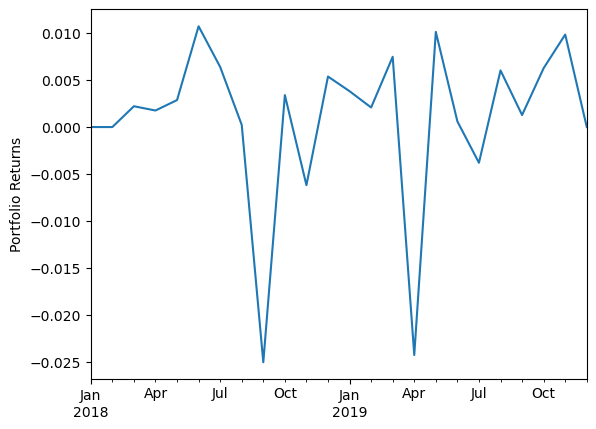

In [91]:
expected_returns.T.sum().plot(ylabel='Portfolio Returns')

In [92]:
# get annualised returns
portfolio_returns = expected_returns.T.sum().dropna()

# mean portfolio returns
mean_portfolio_returns = portfolio_returns.mean() 

# get standard error
portfolio_ret_ste = portfolio_returns.sem()

# get percentage annualised rate of return from the log portfolio returns
portfolio_ret_annual_rate = (np.exp(mean_portfolio_returns * 12) - 1) * 100

print(f"""Mean: {mean_portfolio_returns:.6f}
Standard Error:{portfolio_ret_ste:.6f}
Annualized Rate of Return:{portfolio_ret_annual_rate:.6f}""")


Mean: 0.000884
Standard Error:0.001814
Annualized Rate of Return:1.066888


In [93]:
from scipy import stats

def analyze_alpha(portfolio_returns):
    """
    Perform a t-test with the null hypothesis being that the expected mean return is zero.
    
    Parameters
    ----------
    portfolio_returns_by_date : Pandas Series
        Expected portfolio returns for each date
    
    Returns
    -------
    t_value
        T-statistic from t-test
    p_value
        Corresponding p-value
    """
    # stats.ttest_1samp performs two tailed t-test so we devide the p-value by 2
    # parameters are values to be analysed and the mean for null hypothesis which is zero in our case

    t_value, p_value = stats.ttest_1samp(portfolio_returns, 0)


    return t_value, p_value/2


t_value, p_value = analyze_alpha(portfolio_returns)

# chose a alpha value for the t-test
alpha = 0.05

print(f"""T-value: {t_value:.6f}
P-value: {p_value:.6f}""")

if p_value < alpha:
    print("Reject the null hypothesis that the expected mean return is zero.")
else:
    print("Fail to reject the null hypothesis that the expected mean return is zero.")

T-value: 0.487554
P-value: 0.315240
Fail to reject the null hypothesis that the expected mean return is zero.


We note that this strategy performs even worse than the previous one. Therefore adding marketcap information in the stocks as weights in long and short stocks did not help.